In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df_ = pd.read_csv("C:/Users/gumly/Desktop/FLO/eCommerce_data_20k.csv" ,delimiter =";")

In [3]:
df_.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [4]:
df = df_

In [5]:
def check_df(dataframe, head):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df, 10)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Head #####################
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App    

In [7]:
df['first_order_date'] = pd.to_datetime(df['first_order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])

In [8]:
df['Omnichannel'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

In [9]:
df.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0


In [10]:
df['Basket_Size'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [11]:
df.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,Basket_Size
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [12]:
check_df(df, 10)

##################### Shape #####################
(19945, 14)
##################### Types #####################
master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
Omnichannel                                 float64
Basket_Size                                 float64
dtype: object
##################### Head #####################
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb

In [13]:
df.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,Basket_Size
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [14]:
df.groupby(["order_channel","Omnichannel"]).agg({"Basket_Size":"sum"})

Basket_Size
order_channel Omnichannel             
Android App   2.0            580915.26
              3.0            852972.44
              4.0            926927.54
              5.0            841739.19
              6.0            722893.58
...                                ...
Mobile        48.0             6090.53
              51.0             9142.94
              61.0             2758.47
              75.0             5297.88
              77.0             5184.05

[163 rows x 1 columns]

In [15]:
df = df.sort_values(by='Basket_Size', ascending=False)

In [16]:
df.head(11)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,Basket_Size
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0,1.0,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.0,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0,1.0,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.0,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0,3.0,18119.14,2587.20,[AKTIFSPOR],4.0,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0,1.0,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.0,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0,2.0,64.97,12038.18,"[ERKEK, KADIN]",20.0,12103.15


In [17]:
df = df.sort_values(by='Omnichannel', ascending=False)

In [18]:
df.head(11)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,Basket_Size
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0,109.0,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.0,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0,87.0,8432.25,139.98,[ERKEK],88.0,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0,81.0,3997.55,242.81,[ERKEK],83.0,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0,74.0,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.0,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0,3.0,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.0,5297.88
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57


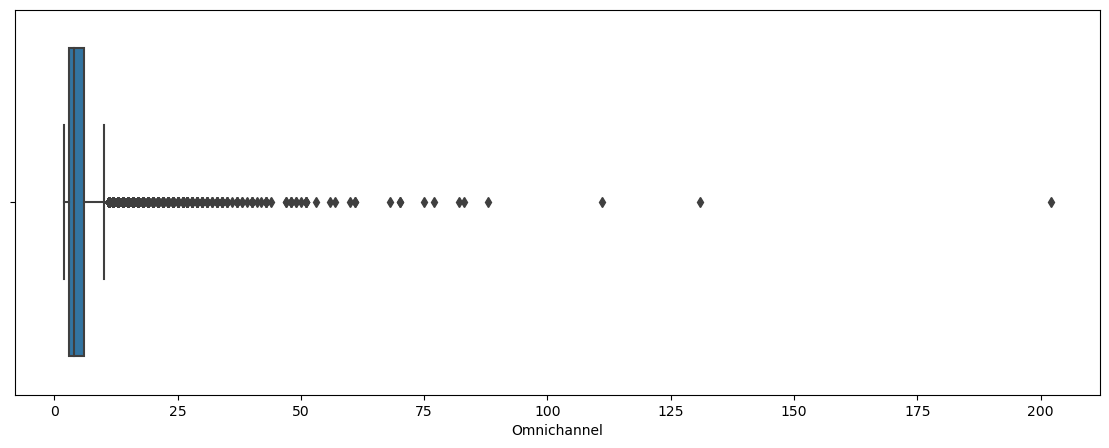

In [19]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Omnichannel");

In [20]:
filtre = df['Omnichannel'] > 10
filtrelenmis_df = df[filtre]
print(filtrelenmis_df)

                                  master_id order_channel last_order_channel  \
11150  5d1c466a-9cfd-11e9-9897-000d3a38a36f   Android App            Desktop   
7223   cba59206-9dd1-11e9-9897-000d3a38a36f   Android App        Android App   
8783   a57f4302-b1a8-11e9-89fa-000d3a38a36f   Android App            Offline   
2619   fdbe8304-a7ab-11e9-a2fc-000d3a38a36f   Android App            Offline   
6322   329968c6-a0e2-11e9-a2fc-000d3a38a36f       Ios App            Ios App   
...                                     ...           ...                ...   
12642  aa7ac8d6-296c-11ea-b87a-000d3a38a36f       Ios App            Offline   
13288  f552db18-abcd-11e9-a2fc-000d3a38a36f   Android App        Android App   
2398   4c393270-a916-11e9-a2fc-000d3a38a36f        Mobile             Mobile   
4109   fbf3cc6a-532b-11ea-acd3-000d3a38a36f   Android App        Android App   
10673  a91e073e-2537-11ea-bf27-000d3a38a36f       Ios App            Ios App   

      first_order_date last_order_date 

In [21]:
df = df[df['Omnichannel'] <= 10]

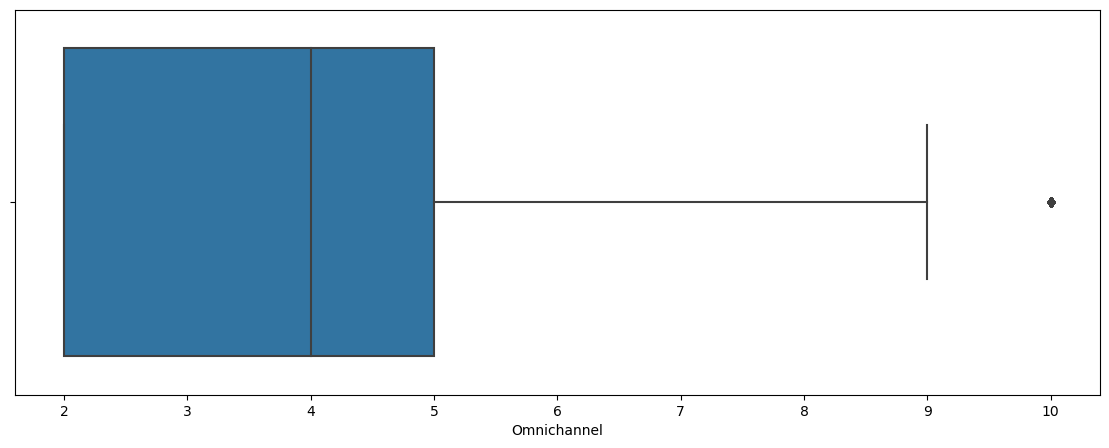

In [22]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Omnichannel");

In [23]:
df.count

<bound method DataFrame.count of                                   master_id order_channel last_order_channel  \
14995  95f4bdac-9d00-11e9-9897-000d3a38a36f        Mobile            Offline   
15091  49bd7b14-b06e-11e9-9757-000d3a38a36f   Android App            Desktop   
316    e12ffb50-b0a2-11e9-9757-000d3a38a36f   Android App             Mobile   
7022   1b454a88-a131-11e9-a2fc-000d3a38a36f   Android App        Android App   
15034  8c3cec06-a6f8-11e9-a2fc-000d3a38a36f   Android App            Offline   
...                                     ...           ...                ...   
11836  1cad5fb4-d633-11e9-93bc-000d3a38a36f        Mobile             Mobile   
17493  5d622bdc-a1c4-11e9-a2fc-000d3a38a36f        Mobile             Mobile   
14509  c59b0dfa-8b82-11eb-95e7-000d3a38a36f        Mobile            Offline   
3774   d9034620-5f5d-11ea-be5b-000d3a38a36f        Mobile            Offline   
14980  0769f8d0-d627-11e9-93bc-000d3a38a36f        Mobile             Mobile   

      

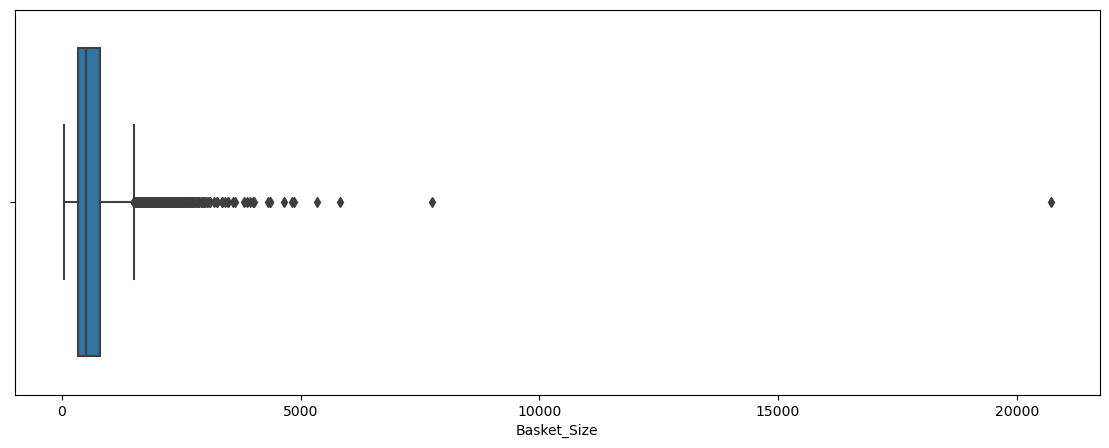

In [24]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Basket_Size");

In [25]:
check_df(df, 10)

##################### Shape #####################
(18546, 14)
##################### Types #####################
master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
Omnichannel                                 float64
Basket_Size                                 float64
dtype: object
##################### Head #####################
                                  master_id order_channel last_order_channel  \
14995  95f4bdac-9

In [26]:
filtre = df['Basket_Size'] > 1000
filtrelenmis_df = df[filtre]
print(filtrelenmis_df)

                                  master_id order_channel last_order_channel  \
15091  49bd7b14-b06e-11e9-9757-000d3a38a36f   Android App            Desktop   
316    e12ffb50-b0a2-11e9-9757-000d3a38a36f   Android App             Mobile   
7022   1b454a88-a131-11e9-a2fc-000d3a38a36f   Android App        Android App   
15034  8c3cec06-a6f8-11e9-a2fc-000d3a38a36f   Android App            Offline   
18310  2667cd84-98cd-11ea-b97a-000d3a38a36f   Android App            Offline   
...                                     ...           ...                ...   
8171   2438bd46-79f3-11ea-bf74-000d3a38a36f        Mobile            Offline   
740    ccfbf366-950b-11ea-85df-000d3a38a36f   Android App            Offline   
3123   65fe33ce-29ed-11ea-87cc-000d3a38a36f   Android App        Android App   
12910  6f225292-bd3f-11ea-aa61-000d3a38a36f   Android App        Android App   
4909   8bd258a8-987b-11ea-9d91-000d3a38a36f       Ios App            Offline   

      first_order_date last_order_date 

In [27]:
df = df[df['Basket_Size'] <= 1000]

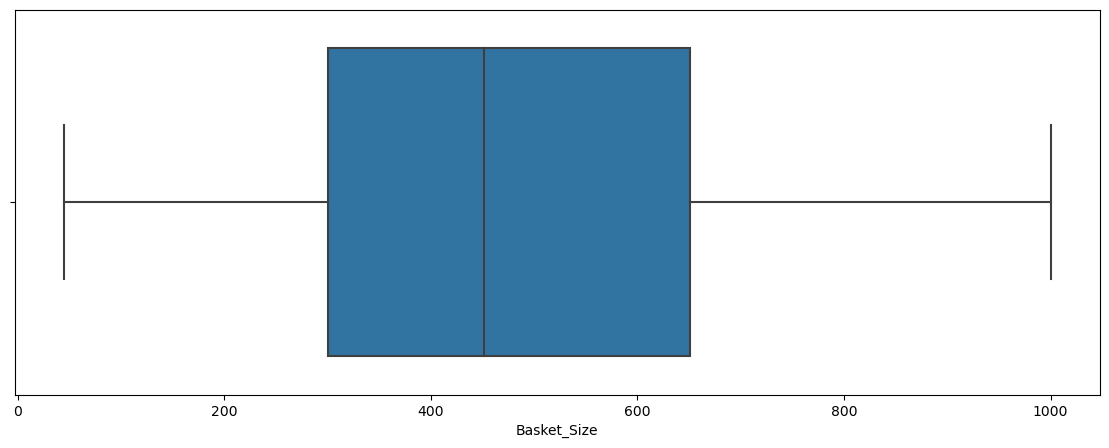

In [28]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Basket_Size");

In [29]:
df.count

<bound method DataFrame.count of                                   master_id order_channel last_order_channel  \
14995  95f4bdac-9d00-11e9-9897-000d3a38a36f        Mobile            Offline   
5040   a99d6eaa-ae15-11e9-a2fc-000d3a38a36f        Mobile            Offline   
12189  3a3b3ede-a703-11e9-a2fc-000d3a38a36f        Mobile            Offline   
18832  ba4851c6-def7-11e9-957d-000d3a38a36f   Android App        Android App   
19676  9bd066fa-43f8-11ea-8b43-000d3a38a36f   Android App        Android App   
...                                     ...           ...                ...   
11836  1cad5fb4-d633-11e9-93bc-000d3a38a36f        Mobile             Mobile   
17493  5d622bdc-a1c4-11e9-a2fc-000d3a38a36f        Mobile             Mobile   
14509  c59b0dfa-8b82-11eb-95e7-000d3a38a36f        Mobile            Offline   
3774   d9034620-5f5d-11ea-be5b-000d3a38a36f        Mobile            Offline   
14980  0769f8d0-d627-11e9-93bc-000d3a38a36f        Mobile             Mobile   

      

In [30]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Omnichannel,Basket_Size
14995,95f4bdac-9d00-11e9-9897-000d3a38a36f,Mobile,Offline,2015-01-06,2021-01-05,2020-09-03,2021-01-05,7.0,3.0,391.21,553.71,"[KADIN, AKTIFSPOR]",10.0,944.92
5040,a99d6eaa-ae15-11e9-a2fc-000d3a38a36f,Mobile,Offline,2018-02-21,2021-05-28,2020-03-19,2021-05-28,4.0,6.0,579.40,360.49,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",10.0,939.89
12189,3a3b3ede-a703-11e9-a2fc-000d3a38a36f,Mobile,Offline,2014-05-10,2021-03-24,2018-06-27,2021-03-24,9.0,1.0,54.99,529.90,[],10.0,584.89
18832,ba4851c6-def7-11e9-957d-000d3a38a36f,Android App,Android App,2020-06-16,2020-12-01,2020-12-01,2020-11-06,9.0,1.0,177.47,617.95,"[AKTIFCOCUK, ERKEK, COCUK, KADIN]",10.0,795.42
19676,9bd066fa-43f8-11ea-8b43-000d3a38a36f,Android App,Android App,2019-11-24,2021-04-02,2021-04-02,2019-11-24,9.0,1.0,70.49,604.87,"[AKTIFCOCUK, AKTIFSPOR]",10.0,675.36


C:\Users\gumly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


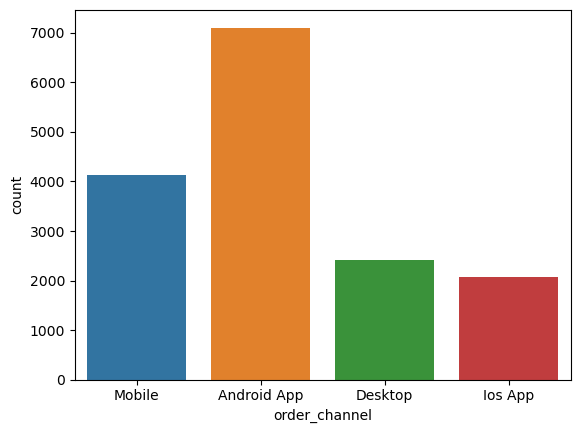

In [31]:
sns.countplot(df["order_channel"])
plt.show()

C:\Users\gumly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


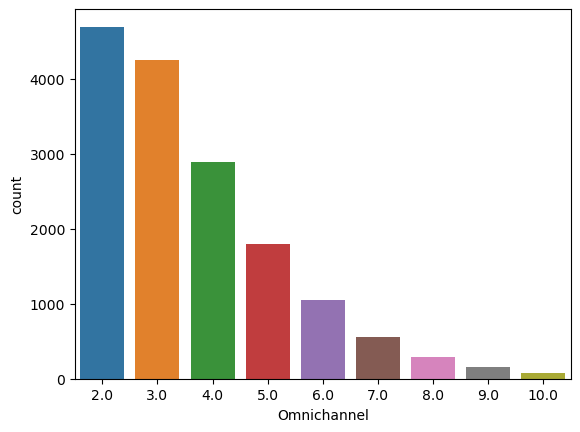

In [32]:
sns.countplot(df["Omnichannel"])
plt.show()

C:\Users\gumly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


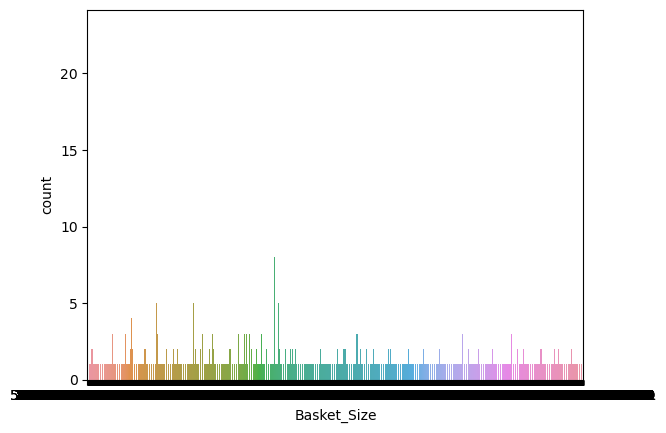

In [33]:
sns.countplot(df["Basket_Size"])
plt.show()

In [34]:
date_convert =  df.columns[df.columns.str.contains("date")]
df[date_convert] = df[date_convert].apply(pd.to_datetime)

C:\Users\gumly\AppData\Local\Temp\ipykernel_1684\1814601820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_convert] = df[date_convert].apply(pd.to_datetime)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15739 entries, 14995 to 14980
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          15739 non-null  object        
 1   order_channel                      15739 non-null  object        
 2   last_order_channel                 15739 non-null  object        
 3   first_order_date                   15739 non-null  datetime64[ns]
 4   last_order_date                    15739 non-null  datetime64[ns]
 5   last_order_date_online             15739 non-null  datetime64[ns]
 6   last_order_date_offline            15739 non-null  datetime64[ns]
 7   order_num_total_ever_online        15739 non-null  float64       
 8   order_num_total_ever_offline       15739 non-null  float64       
 9   customer_value_total_ever_offline  15739 non-null  float64       
 10  customer_value_total_ever_onli

In [36]:
df["last_order_date"].max()
today_date = dt.datetime(2023, 9, 28)

rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["Recency"] = (today_date - df["last_order_date"]).astype('timedelta64[D]')
rfm["Frequency"] = df["Omnichannel"]
rfm["Monetary"] = df["Basket_Size"]

rfm.head()

NameError: name 'dt' is not defined

In [ ]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

rfm.describe().T

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'}
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm.head(10)

In [ ]:
rfm[["segment","Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "sum", "max", "count"])